Performing Classification on Breast Cancer dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# importing the dataset.
from sklearn.datasets import load_breast_cancer
df=load_breast_cancer(as_frame=True)

In [3]:
# splitting the target and features data from dataset
x=df.data
y=df.target

In [11]:
# now let's split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
# now standardizing the data for better classification.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [13]:
# now creating the SVM Classifier Model
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=42)


In [14]:
# fitting the model on training data
classifier.fit(x_train,y_train,)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
# now predicting for test data
y_pred=classifier.predict(x_test)

In [19]:
# now lets check for the accuray score and other evaluation metrics for trained model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy Score :-",accuracy_score(y_test,y_pred))
print("Confusion Matrix :- \n",confusion_matrix(y_test,y_pred))
print("Classification Report :- \n",classification_report(y_test,y_pred))

Accuracy Score :- 0.956140350877193
Confusion Matrix :- 
 [[41  2]
 [ 3 68]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# now lets do hyperparameter tunning and create best model for our dataset
from sklearn.model_selection import GridSearchCV

param={
    'C':[0.1,1,10,100],     #C=Regularization Parameter (controls margin vs misclassification) penaly metrics
    'gamma':['scale','auto',0.001,0.01,0.1,1],
    'kernel':['linear','rbf','poly']
}

model2=GridSearchCV(SVC(),param,cv=5,verbose=1,refit=True)


In [25]:
# now fitting our new hyperparameter tuned model on trained dataset
model2.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [26]:
# now lets check for best parametrs for the dataset
print("Best Parameters :- ",model2.best_params_)
print("Best CV Score :-",model2.best_score_)

Best Parameters :-  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score :- 0.9758241758241759


In [27]:
# now lets predict with our new model
y_pred_new=model2.predict(x_test)

In [28]:
# now lets see the best accuracy and final classification report on new model
print("Accuracy Score :-",accuracy_score(y_test,y_pred_new))
print("Classification Report :- \n",classification_report(y_test,y_pred_new))

Accuracy Score :- 0.9824561403508771
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



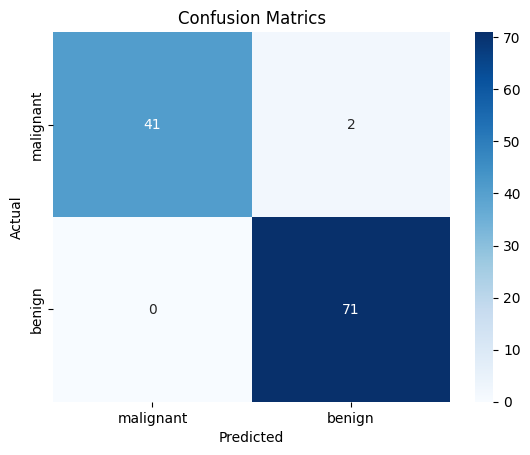

In [29]:
# now lets visualize the confusion matrix for our model better understanding
cm=confusion_matrix(y_test,y_pred_new)

sns.heatmap(cm, annot=True,fmt='d',cmap='Blues',
            xticklabels=df.target_names,
            yticklabels=df.target_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrics")
plt.show()

The confusion Matrix shows that it predicted 41 pateints are maligent correctly and 71 pateints are bengin correctely only 2 maligant pateints are predicted wrongly.